In [3]:
import matplotlib.pyplot as plt
from ops import get_mask
from ops import flatten_img
from ops import clip
from ops import conv
from ops import get_mask
from ops import rgb2gray

In [4]:
image = plt.imread('./bird.png')
gray_image = rgb2gray(image, option = 0)

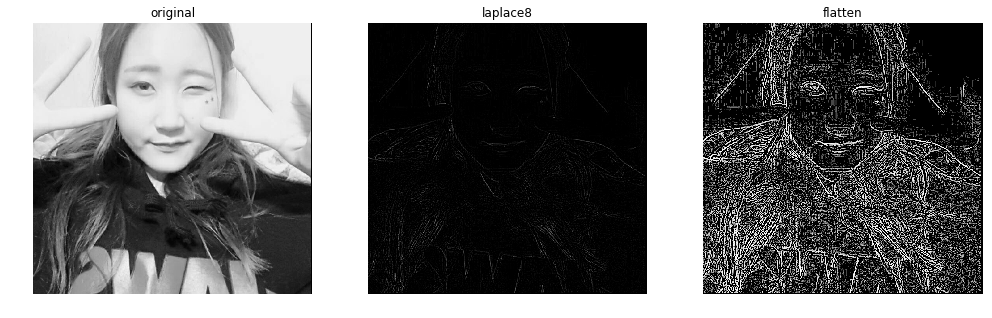

In [5]:
mask_type = 'laplace8'
mask = get_mask(mask_type)
conv_image = conv(gray_image, mask)
flat_image = flatten_img(conv_image)
fig = plt.figure(figsize=(17,17))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
ax1.imshow(gray_image, cmap = 'gray')
ax1.set_title('original')
ax1.set_axis_off()
ax2.imshow(conv_image, cmap = 'gray')
ax2.set_title(mask_type)
ax2.set_axis_off()
ax3.imshow(flat_image, cmap = 'gray')
ax3.set_title('flatten')
ax3.set_axis_off()
plt.show()